In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, minmax_scale



%matplotlib inline
%config InlineBackend.feature_format = 'retina'


In [5]:
meta_df = pd.read_csv('gutenberg_metadata_en.csv', index_col = 'Unnamed: 0')

In [7]:
meta_df['literature'] = meta_df['subjects2'].map(lambda sub: 1 if 'literature' in str(sub).lower().replace("'", '') else 0)
meta_df['fiction'] = meta_df['subjects2'].map(lambda sub: 1 if 'fiction' in str(sub).lower().replace("'", '') else 0)

In [14]:
lit_fiction = meta_df[(meta_df.literature == 1) | (meta_df.fiction == 1)].reset_index(drop = True)
lit_fiction.shape

(16049, 14)

In [9]:
lit_fiction.head(2)

,id,title,author,LCC,downloads,subjects,subjects2,formats,authoryearofbirth,authoryearofdeath,type,language,literature,fiction
0,15,Moby Dick,"Melville, Herman",{PS},707,"{Ship captains -- Fiction, Whaling ships -- Fi...","[Adventure stories, Ahab, Captain (Fictitious ...",{u'text/html': u'http://www.gutenberg.org/eboo...,1819.0,1891.0,Text,[en],0,1
1,16,Peter Pan,"Barrie, J. M. (James Matthew)","{PZ, PR}",4778,"{Peter Pan (Fictitious character) -- Fiction, ...","[Fairies, Fantasy, Fiction, Juvenile fiction, ...",{u'text/plain; charset=utf-8': u'http://www.gu...,1860.0,1937.0,Text,[en],0,1


In [15]:
texts1 = pd.read_csv('book_texts/book_data_1', encoding = 'utf8', index_col = 'Unnamed: 0')
texts1.shape

(699, 2)

In [16]:
texts1.head()

,id,text
0,15,[Note: This is one of Project Gutenberg's earl...
1,16,PETER PAN\n\n[PETER AND WENDY]\n\nBy J. M. Bar...
2,24,O PIONEERS!\n\nby Willa Cather\n\n\n\n\nPART I...
3,27,NOTE:\n\nThis edition has NOT been prepared in...
4,32,HERLAND\n\nby Charlotte Perkins Stetson Gilman...


In [13]:
lit_fiction_1 = pd.merge(lit_fiction, texts1, on = 'id')
lit_fiction_1.shape

(699, 15)

In [12]:
lit_fiction_1.head(2)

,id,title,author,LCC,downloads,subjects,subjects2,formats,authoryearofbirth,authoryearofdeath,type,language,literature,fiction,text
0,15,Moby Dick,"Melville, Herman",{PS},707,"{Ship captains -- Fiction, Whaling ships -- Fi...","[Adventure stories, Ahab, Captain (Fictitious ...",{u'text/html': u'http://www.gutenberg.org/eboo...,1819.0,1891.0,Text,[en],0,1,[Note: This is one of Project Gutenberg's earl...
1,16,Peter Pan,"Barrie, J. M. (James Matthew)","{PZ, PR}",4778,"{Peter Pan (Fictitious character) -- Fiction, ...","[Fairies, Fantasy, Fiction, Juvenile fiction, ...",{u'text/plain; charset=utf-8': u'http://www.gu...,1860.0,1937.0,Text,[en],0,1,PETER PAN\n\n[PETER AND WENDY]\n\nBy J. M. Bar...


In [17]:
tvec = TfidfVectorizer(strip_accents='unicode',
                        decode_error='replace',
                        lowercase=True,
                        stop_words='english',
                        min_df = 0.1, 
                        max_df=0.90, 
                        max_features = 5000)
X = tvec.fit_transform(texts1.text)
X

<699x5000 sparse matrix of type '<type 'numpy.float64'>'
	with 1827434 stored elements in Compressed Sparse Row format>

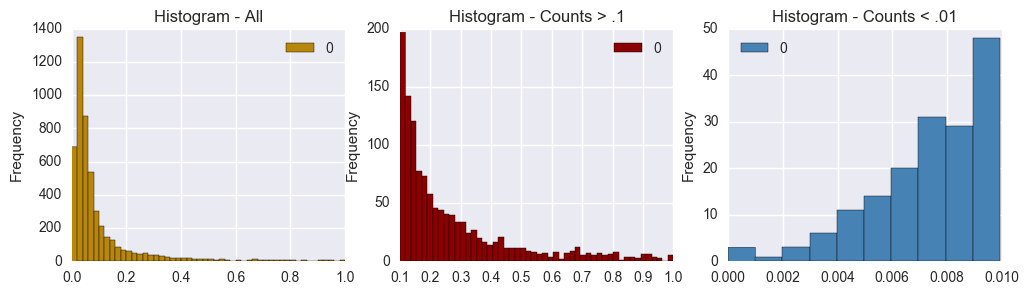

In [24]:
def hist_counts(X_all):

    count_df = pd.DataFrame(X_all.toarray())
    hist_counts = pd.DataFrame(minmax_scale(count_df.max()))
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 3))
    hist_counts.plot(kind="hist", bins=50, title="Histogram - All", color = 'darkgoldenrod', ax = ax1)
    hist_counts[hist_counts[0] > .1].plot(kind="hist", bins=50, title="Histogram - Counts > .1", color = 'darkred', ax = ax2) # There are a lot of really common tokens within 10% -- filter them out
    hist_counts[hist_counts[0] < .01].plot(kind="hist", title="Histogram - Counts < .01", color = 'steelblue', ax = ax3) # look at the range of extreme commons that seem to exist below .01
    
hist_counts(X)